##### 6. 산지별 비교

- Data Prep

국내 주소만 남김

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
import folium
from folium.features import DivIcon
import json

In [2]:
df = pd.read_csv('./data/fruits1.csv')

In [3]:
df

SALEDATE WHSAL_NM   CMP_NM PUM_NM KIND_NM DAN_NM POJ_NM LV_NM  \
0        2020-12-31   서울가락도매     중앙청과     딸기      설향     kg     상자     특   
1        2020-12-31   서울가락도매     중앙청과     딸기      설향     kg     상자     특   
2        2020-12-31   부산반여도매     동부청과     딸기      육보     kg     상자     상   
3        2020-12-31   서울가락도매     한국청과     딸기      설향     kg     상자     특   
4        2020-12-31   구리도매시장     구리청과     딸기      설향     kg     상자    등외   
...             ...      ...      ...    ...     ...    ...    ...   ...   
3288304  2023-01-02   전주도매시장  전주원협(공)     포도   네오마스캇     kg     상자     특   
3288305  2023-01-02   광주서부도매     두레청과     포도   샤인마스캇     kg     상자    등외   
3288306  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   
3288307  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   
3288308  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   

           SAN_NM  DANQ      QTY          COST  TOT_QTY    TOT_AMT  
0        경상남도 산청군   2.0  15838.0  17338.300290  31676.0  274604000  
1        충청남도 논산시   1.0  15421.0   9522.404513  15421.0  146845000  
2           부산광역시   2.0   5996.0  30004.000000  11992.0  179903984  
3        충청남도 공주시   2.0   4807.0  14628.562513   9614.0   70319500  
4          경기 구리시   2.0   4606.0  22562.092922   9212.0  103921000  
...           ...   ...      ...           ...      ...        ...  
3288304       태평양   2.0      1.0  60000.000000      2.0      60000  
3288305    경북 영천시   2.0      1.0   4000.000000      2.0       4000  
3288306    광주 광산구   4.0     44.0  28000.000000    176.0    1232000  
3288307    전북 전주시   2.0     43.0  12534.883721     86.0     539000  
3288308    전북 전주시   4.0      3.0  27000.000000     12.0      81000  

[3288309 rows x 14 columns]

**행정구역**
- 강원도
- 경기도
- 경상북도
- 경상남도
- 전라북도
- 전라남도
- 충청북도
- 충청남도
- 서울특별시
- 세종특별자치시
- 부산광역시
- 대구광역시
- 인천광역시
- 광주광역시
- 대전광역시
- 울산광역시

In [4]:
# 국내 산지
df = df[df['SAN_NM'].str.contains('군|구|도|시')]
df

SALEDATE WHSAL_NM   CMP_NM PUM_NM KIND_NM DAN_NM POJ_NM LV_NM  \
0        2020-12-31   서울가락도매     중앙청과     딸기      설향     kg     상자     특   
1        2020-12-31   서울가락도매     중앙청과     딸기      설향     kg     상자     특   
2        2020-12-31   부산반여도매     동부청과     딸기      육보     kg     상자     상   
3        2020-12-31   서울가락도매     한국청과     딸기      설향     kg     상자     특   
4        2020-12-31   구리도매시장     구리청과     딸기      설향     kg     상자    등외   
...             ...      ...      ...    ...     ...    ...    ...   ...   
3288303  2023-01-02   정읍도매시장     정일청과     포도   샤인마스캇     kg     상자     상   
3288305  2023-01-02   광주서부도매     두레청과     포도   샤인마스캇     kg     상자    등외   
3288306  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   
3288307  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   
3288308  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   

           SAN_NM  DANQ      QTY          COST  TOT_QTY    TOT_AMT  
0        경상남도 산청군   2.0  15838.0  17338.300290  31676.0  274604000  
1        충청남도 논산시   1.0  15421.0   9522.404513  15421.0  146845000  
2           부산광역시   2.0   5996.0  30004.000000  11992.0  179903984  
3        충청남도 공주시   2.0   4807.0  14628.562513   9614.0   70319500  
4          경기 구리시   2.0   4606.0  22562.092922   9212.0  103921000  
...           ...   ...      ...           ...      ...        ...  
3288303    전북 정읍시   2.0      3.0  17000.000000      6.0      51000  
3288305    경북 영천시   2.0      1.0   4000.000000      2.0       4000  
3288306    광주 광산구   4.0     44.0  28000.000000    176.0    1232000  
3288307    전북 전주시   2.0     43.0  12534.883721     86.0     539000  
3288308    전북 전주시   4.0      3.0  27000.000000     12.0      81000  

[3099464 rows x 14 columns]

In [5]:
df[df['SAN_NM'].str.contains('대구')]['SAN_NM'].unique()
# df[df['SAN_NM'].str.contains('강원')]

array(['대구 북구', '대구광역시', '부산 해운대구', '대구 달성군', '대구광역시 달성군', '대구 동구',
       '대구 달서구', '대구 중구', '대구 남구', '대구 수성구', '대구광역시 달서구', '부산광역시 해운대구',
       '대구 서구', '대구광역시 수성구'], dtype=object)

In [6]:
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b강원\b', '강원도', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b경기\b', '경기도', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace('경남', '경상남도')
df['SAN_NM'] = df['SAN_NM'].str.replace('경북', '경상북도')
df['SAN_NM'] = df['SAN_NM'].str.replace('전남', '전라남도')
df['SAN_NM'] = df['SAN_NM'].str.replace('전북', '전라북도')
df['SAN_NM'] = df['SAN_NM'].str.replace('충남', '충청남도')
df['SAN_NM'] = df['SAN_NM'].str.replace('충북', '충청북도')
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b서울\b', '서울특별시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace('세종시', '세종특별자치시')
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b부산\b', '부산광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b대구\b', '대구광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b인천\b', '인천광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b광주\b', '광주광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b대전\b', '대전광역시', regex=True)
df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b울산\b', '울산광역시', regex=True)

C:\Users\USER\AppData\Local\Temp\ipykernel_75260\4038322579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b강원\b', '강원도', regex=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_75260\4038322579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SAN_NM'] = df['SAN_NM'].str.replace(r'\b경기\b', '경기도', regex=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_75260\4038322579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [7]:
# '포도', '망고', '체리', '레몬', '블루베리', '수박' ,'딸기', '메론' 
df_grape = df[df['PUM_NM']=='포도']
df_mango = df[df['PUM_NM']=='망고']
df_cherry = df[df['PUM_NM']=='체리']
df_lemon = df[df['PUM_NM']=='레몬']
df_blueberry = df[df['PUM_NM']=='블루베리']
df_watermelon = df[df['PUM_NM']=='수박']
df_strawberry = df[df['PUM_NM']=='딸기']
df_melon = df[df['PUM_NM']=='메론']

In [10]:
# df_grape[df_grape['TOT_QTY'] == df_grape['TOT_QTY'].max()]
# grape_g = df_grape[df_grape['SAN_NM'].str.contains('경기도')]['COST'].mean()
# print(grape_g)


품목별로 16개의 주요행정구역별 cost의 평균과 tot_qty의 합으로 나타냄

In [8]:
san_values = [
    '강원도', '경기도', '경상북도', '경상남도', '전라북도', '전라남도',
    '충청북도', '충청남도', '서울특별시', '세종특별자치시', '부산광역시',
    '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시'
]

In [9]:
def df_fruits(df, san_values):
    san_df = pd.DataFrame({'SAN': san_values})
    mean_costs = []
    tot_qtys = []

    for san in san_values:
        filter_san = df[df['SAN_NM'].str.contains(san)]
        mean_cost = filter_san['COST'].mean()
        tot_qty = filter_san['TOT_QTY'].sum()
        mean_costs.append(mean_cost)
        tot_qtys.append(tot_qty)

    san_df['MEAN_COST'] = mean_costs
    san_df['TOT_QTY'] = tot_qtys
    return san_df

In [10]:
fruits = ['grape', 'mango', 'cherry', 'lemon', 'blueberry', 'watermelon', 'strawberry', 'melon']
df_dict = {name: globals()[f'df_{name}'] for name in fruits}

fruit_dfs = {name: df_fruits(df, san_values) for name, df in df_dict.items()}

for name, summary_df in fruit_dfs.items():
    print(f"{name} summary:")
    print(summary_df)
    print()

grape summary:
        SAN     MEAN_COST       TOT_QTY
0       강원도  18267.450206  1.799074e+06
1       경기도  24617.853530  2.555674e+07
2      경상북도  18936.772130  1.948024e+08
3      경상남도  15939.695509  1.014567e+07
4      전라북도  18590.045241  2.088320e+07
5      전라남도  20673.661919  3.613393e+06
6      충청북도  17209.019901  2.691856e+07
7      충청남도  17517.407354  8.464473e+06
8     서울특별시  32308.273348  4.116533e+06
9   세종특별자치시  15549.943967  6.775800e+03
10    부산광역시  22671.171676  3.109457e+06
11    대구광역시  20000.163361  5.816620e+06
12    인천광역시  16552.912197  1.478972e+06
13    광주광역시  21752.348416  1.205550e+06
14    대전광역시  17683.780091  3.235866e+06
15    울산광역시  36120.132408  5.374402e+05

mango summary:
        SAN     MEAN_COST   TOT_QTY
0       강원도  36451.225379    5903.0
1       경기도  41640.899123  657892.4
2      경상북도  44506.302427  111546.5
3      경상남도  61685.926479  101055.0
4      전라북도  46223.233508   73504.2
5      전라남도  81477.405522  138034.0
6      충청북도  41743.786404     624.0
7

In [11]:
grape = fruit_dfs['grape']
mango = fruit_dfs['mango']
cherry = fruit_dfs['cherry']
lemon = fruit_dfs['lemon']
blueberry = fruit_dfs['blueberry']
watermelon = fruit_dfs['watermelon']
strawberry = fruit_dfs['strawberry']
melon = fruit_dfs['melon']

In [12]:
grape['MEAN_COST'] = grape['MEAN_COST'].fillna(0)
mango['MEAN_COST'] = mango['MEAN_COST'].fillna(0)
cherry['MEAN_COST'] = cherry['MEAN_COST'].fillna(0)
lemon['MEAN_COST'] = lemon['MEAN_COST'].fillna(0)
blueberry['MEAN_COST'] = blueberry['MEAN_COST'].fillna(0)
watermelon['MEAN_COST'] = watermelon['MEAN_COST'].fillna(0)
strawberry['MEAN_COST'] = strawberry['MEAN_COST'].fillna(0)
melon['MEAN_COST'] = melon['MEAN_COST'].fillna(0)

##### 행정구역별 평균 단가와 거래량 비교

- 포도

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3791503257.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3791503257.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


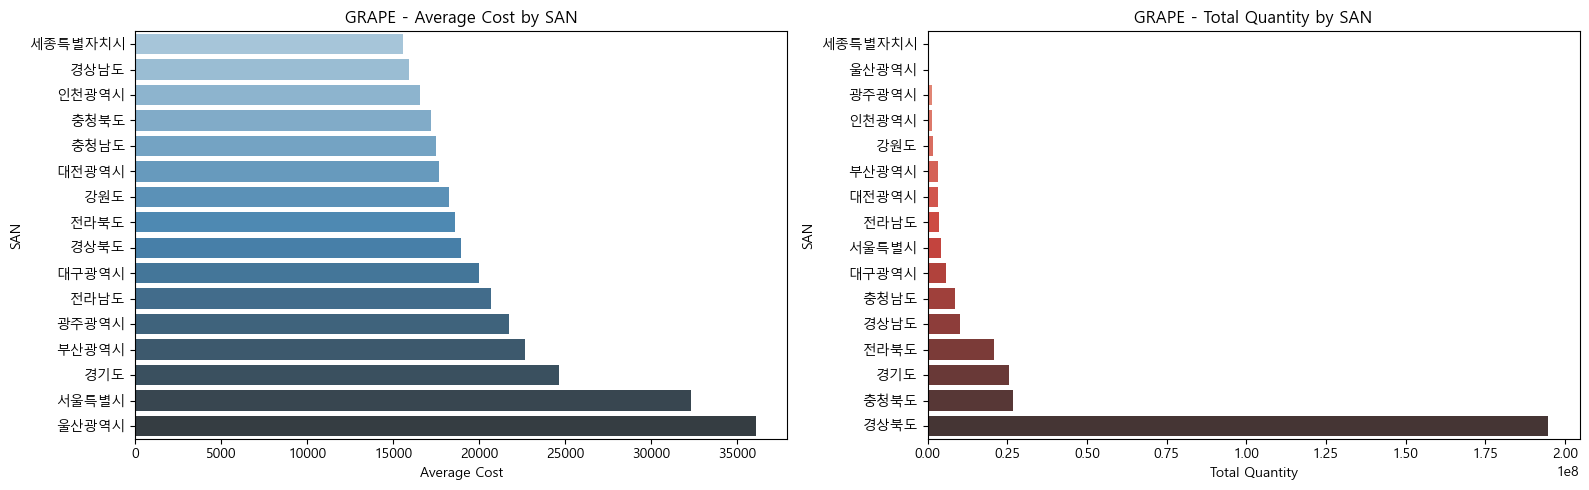

In [59]:
plt.figure(figsize=(16, 5))

grape_cost = grape.sort_values(by='MEAN_COST', ascending=True)
grape_qty = grape.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('GRAPE - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('GRAPE - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 망고

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3497742857.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3497742857.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


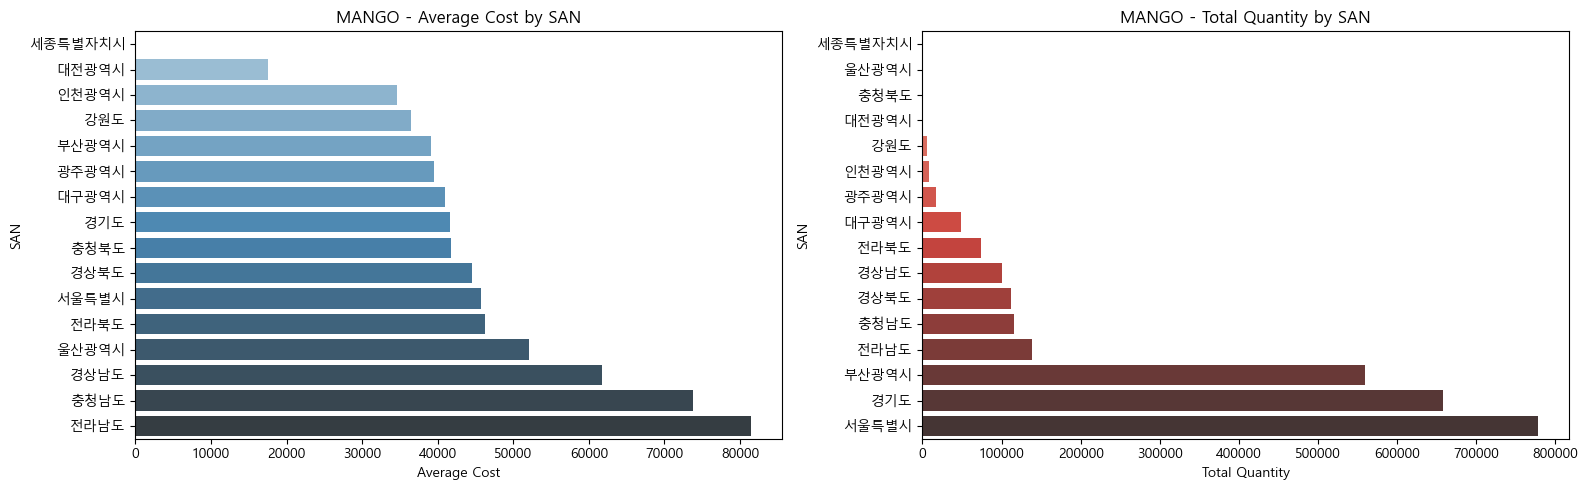

In [60]:
plt.figure(figsize=(16, 5))

grape_cost = mango.sort_values(by='MEAN_COST', ascending=True)
grape_qty = mango.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('MANGO - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('MANGO - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 체리

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\108515369.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\108515369.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


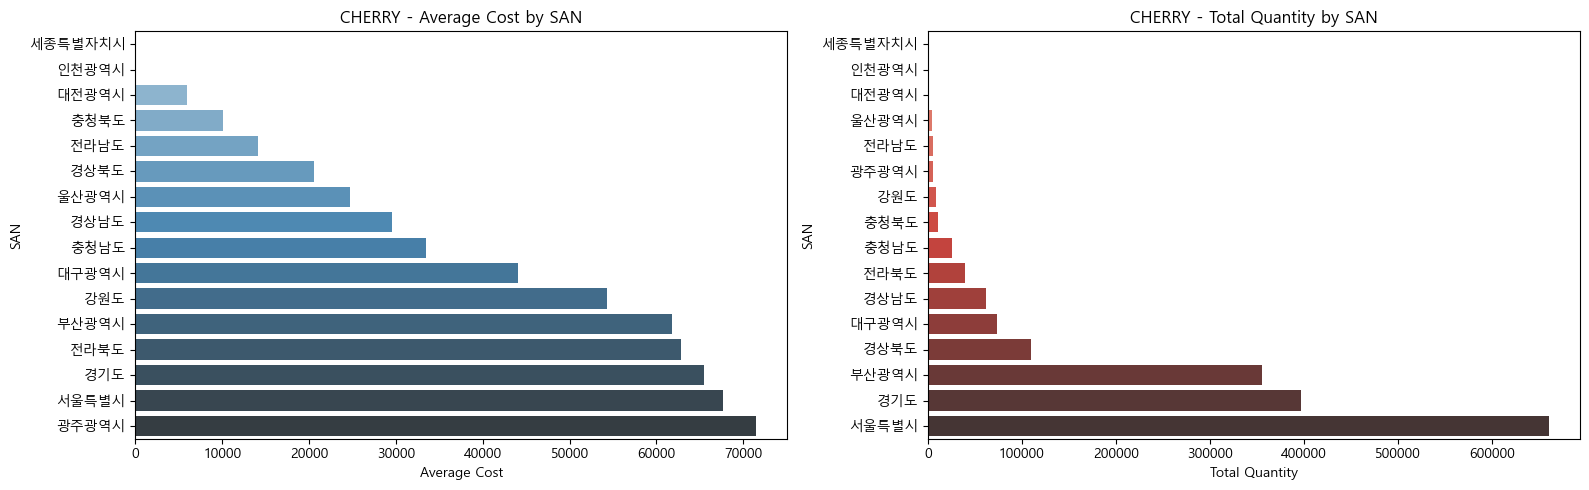

In [61]:
plt.figure(figsize=(16, 5))

grape_cost = cherry.sort_values(by='MEAN_COST', ascending=True)
grape_qty = cherry.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('CHERRY - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('CHERRY - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 레몬

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\1036456264.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\1036456264.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


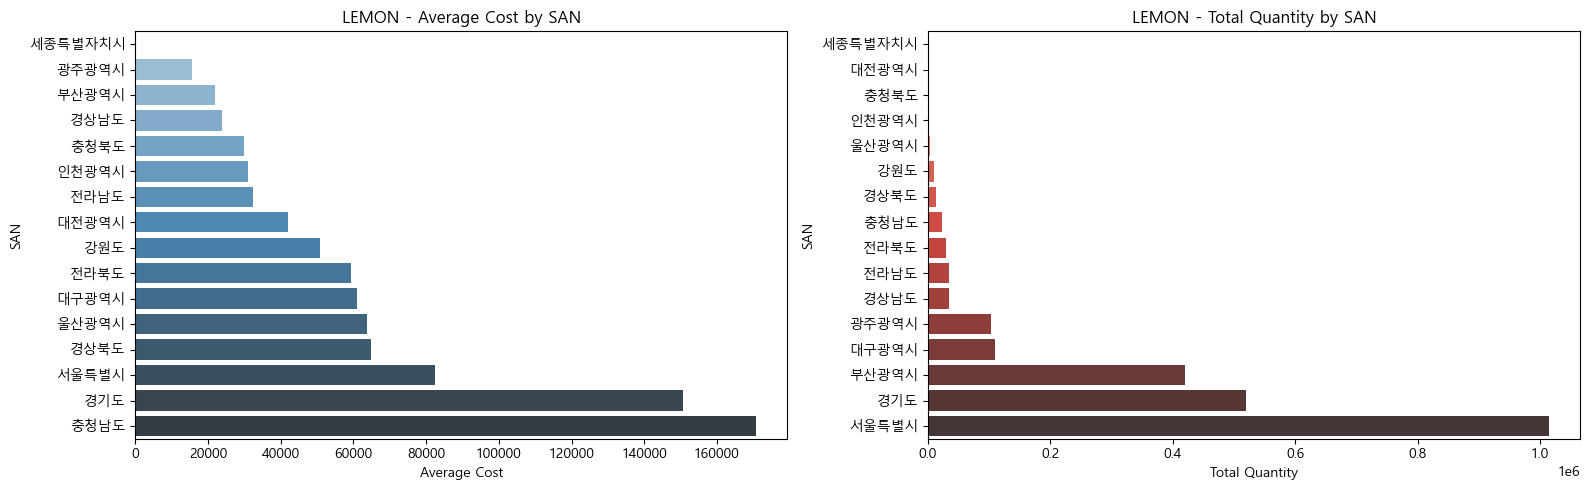

In [62]:
plt.figure(figsize=(16, 5))

grape_cost = lemon.sort_values(by='MEAN_COST', ascending=True)
grape_qty = lemon.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('LEMON - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('LEMON - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 블루베리

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\1604793109.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\1604793109.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


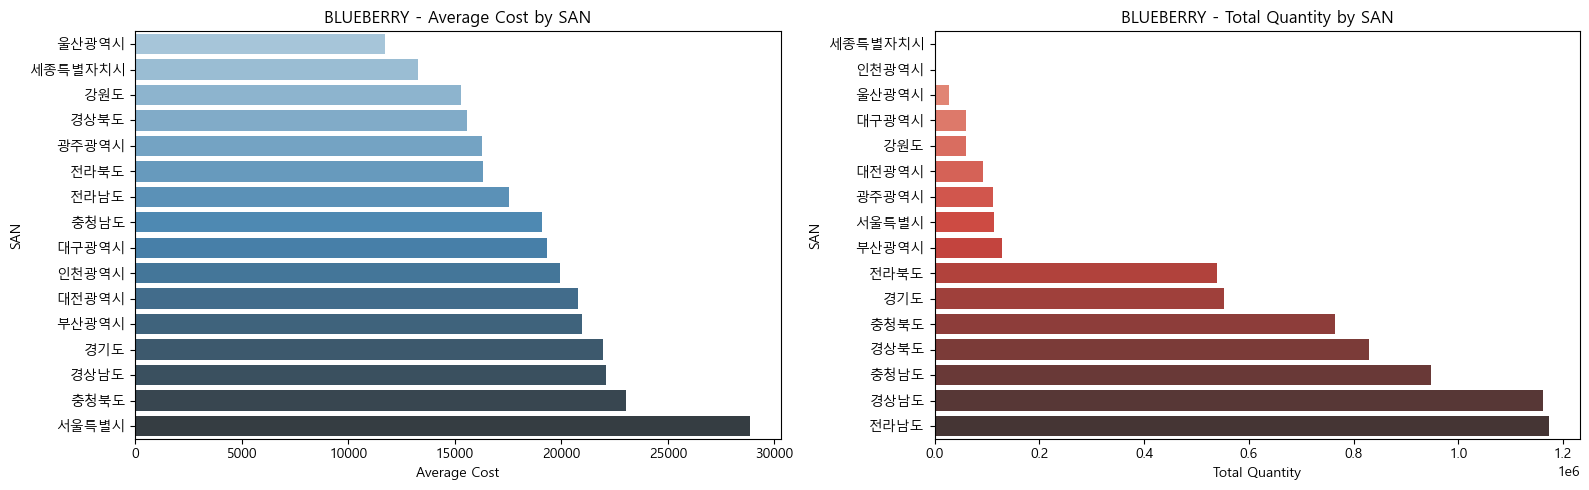

In [63]:
plt.figure(figsize=(16, 5))

grape_cost = blueberry.sort_values(by='MEAN_COST', ascending=True)
grape_qty = blueberry.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('BLUEBERRY - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('BLUEBERRY - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 수박

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3632204992.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3632204992.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


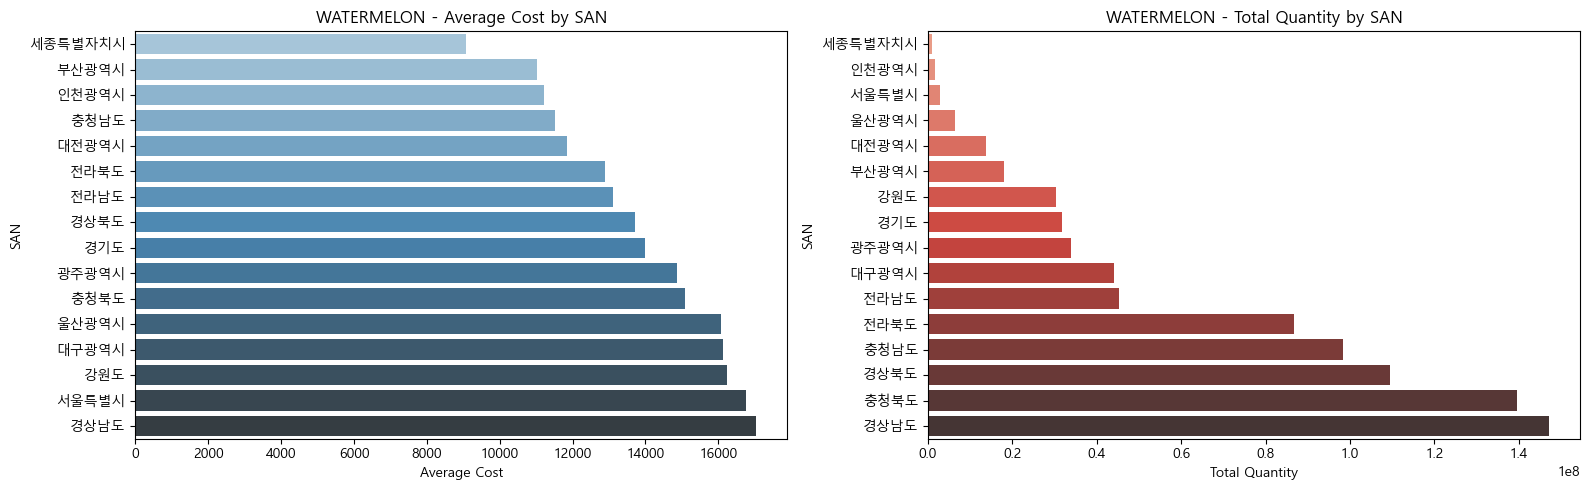

In [64]:
plt.figure(figsize=(16, 5))

grape_cost = watermelon.sort_values(by='MEAN_COST', ascending=True)
grape_qty = watermelon.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('WATERMELON - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('WATERMELON - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 딸기

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\1243022148.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\1243022148.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


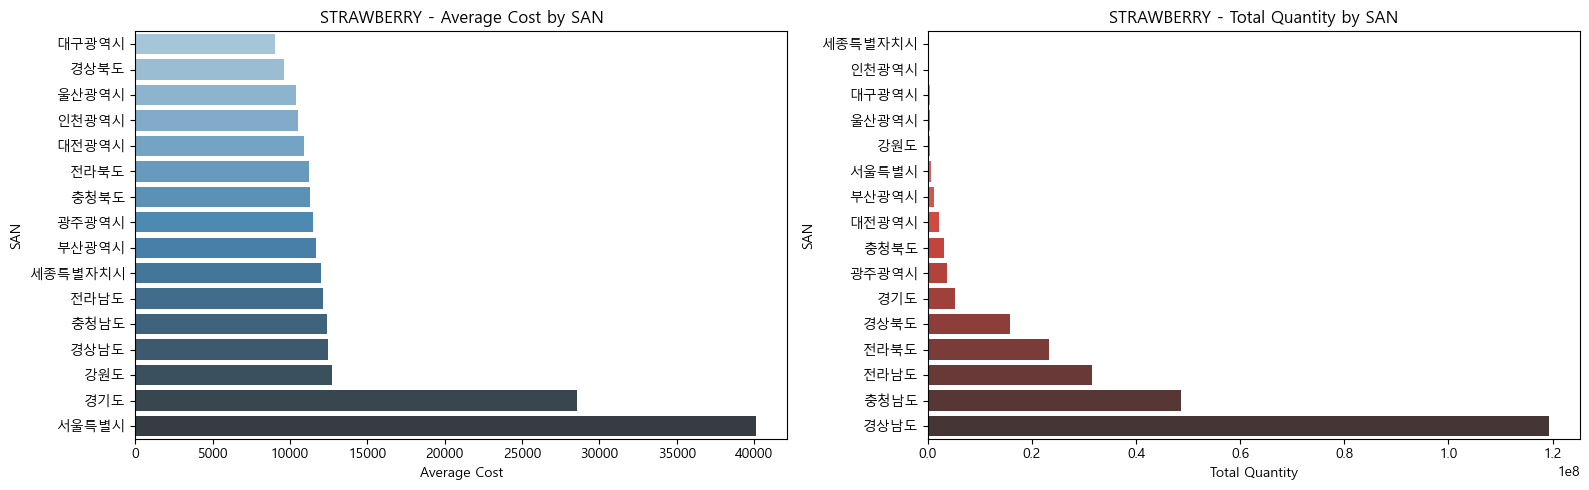

In [65]:
plt.figure(figsize=(16, 5))

grape_cost = strawberry.sort_values(by='MEAN_COST', ascending=True)
grape_qty = strawberry.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('STRAWBERRY - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('STRAWBERRY - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

- 멜론

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\2177384270.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\2177384270.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')


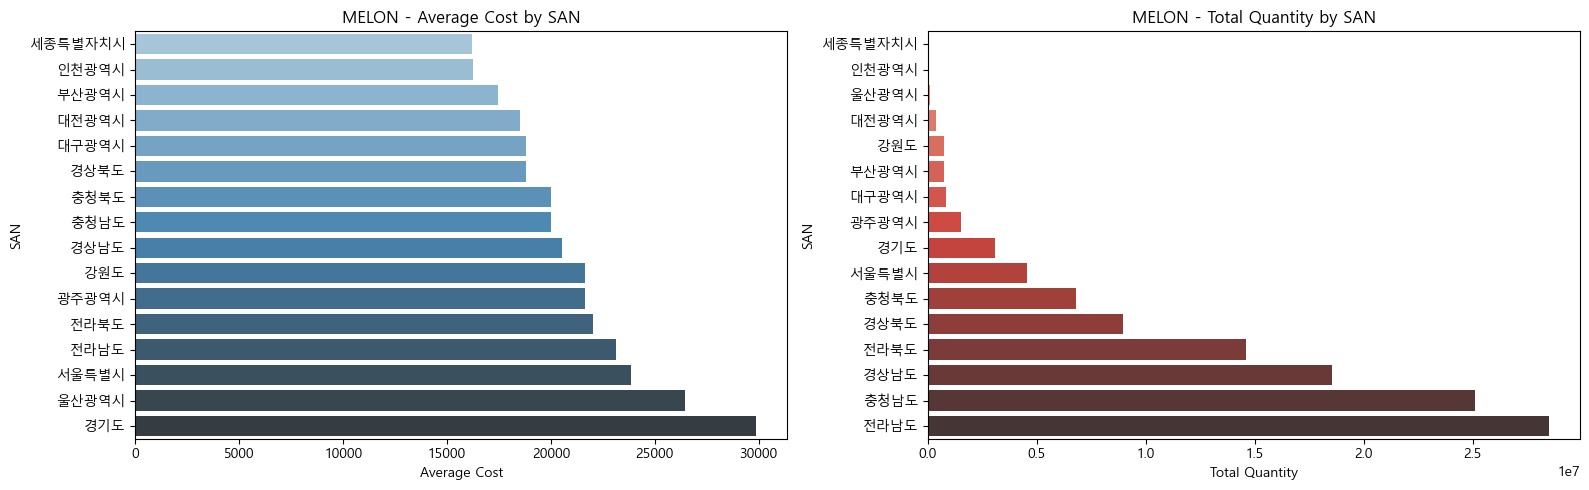

In [66]:
plt.figure(figsize=(16, 5))

grape_cost = melon.sort_values(by='MEAN_COST', ascending=True)
grape_qty = melon.sort_values(by='TOT_QTY', ascending=True)

# MEAN_COST
plt.subplot(1, 2, 1)
sns.barplot(x='MEAN_COST', y='SAN', data=grape_cost, palette='Blues_d')
plt.title('MELON - Average Cost by SAN')
plt.ylabel('SAN')
plt.xlabel('Average Cost')

# TOT_QTY
plt.subplot(1, 2, 2)
sns.barplot(x='TOT_QTY', y='SAN', data=grape_qty, palette='Reds_d')
plt.title('MELON - Total Quantity by SAN')
plt.ylabel('SAN')
plt.xlabel('Total Quantity')

plt.tight_layout()
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3252477167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=df_sorted_mean_cost, palette='Blues_d', ax=axes[i, 0])
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3252477167.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_QTY', y='SAN', data=df_sorted_tot_qty, palette='Reds_d', ax=axes[i, 1])
C:\Users\USER\AppData\Local\Temp\ipykernel_67240\3252477167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MEAN_COST', y='SAN', data=df_sorted_mean_c

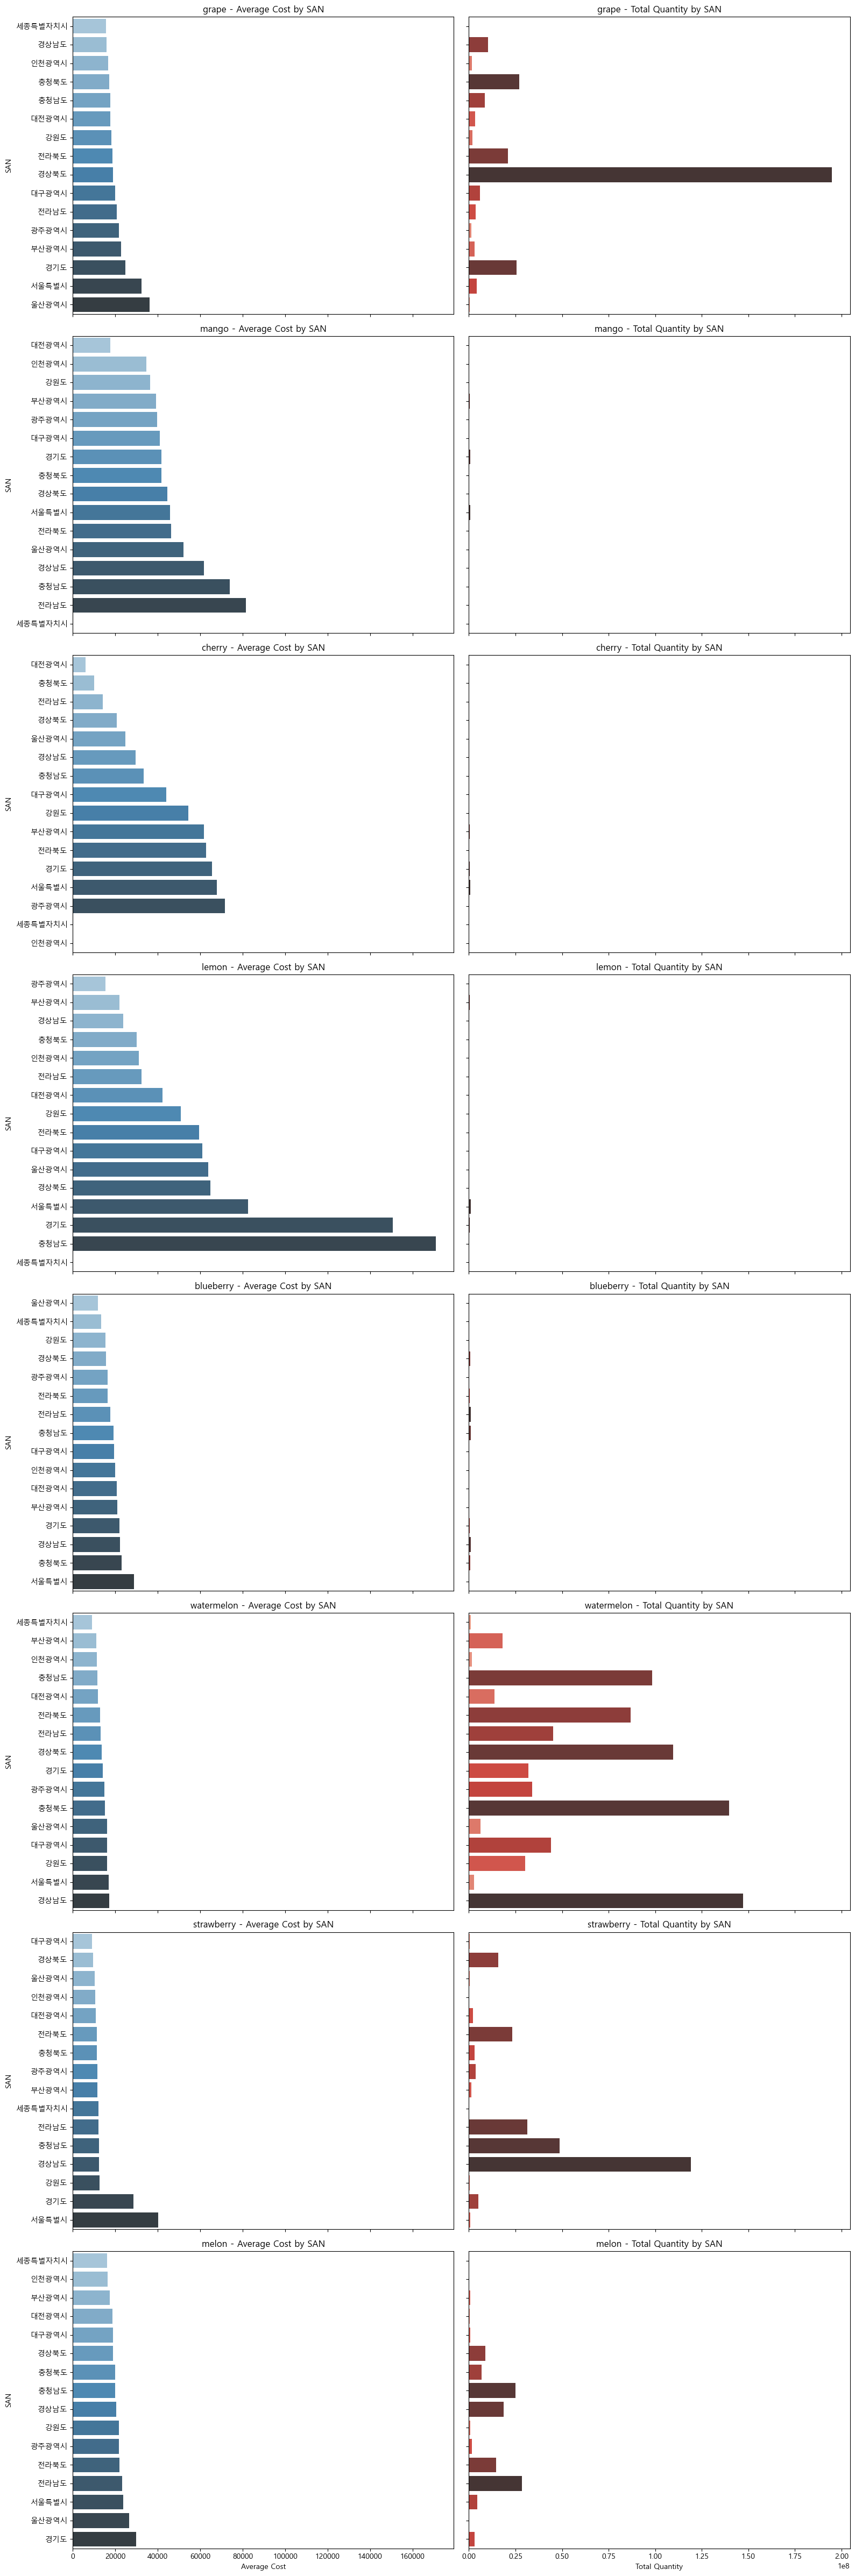

In [20]:
fruits = ['grape', 'mango', 'cherry', 'lemon', 'blueberry', 'watermelon', 'strawberry', 'melon']

fig, axes = plt.subplots(len(fruits), 2, figsize=(16, len(fruits) * 6), sharex='col', sharey='row')

for i, fruit in enumerate(fruits):
    dfs = fruit_dfs[fruit]
    
    df_sorted_mean_cost = dfs.sort_values(by='MEAN_COST', ascending=True)
    df_sorted_tot_qty = dfs.sort_values(by='TOT_QTY', ascending=True)
    
    # MEAN_COST
    sns.barplot(x='MEAN_COST', y='SAN', data=df_sorted_mean_cost, palette='Blues_d', ax=axes[i, 0])
    axes[i, 0].set_title(f'{fruit} - Average Cost by SAN')
    axes[i, 0].set_xlabel('Average Cost')
    axes[i, 0].set_ylabel('SAN')
    
    # TOT_QTY
    sns.barplot(x='TOT_QTY', y='SAN', data=df_sorted_tot_qty, palette='Reds_d', ax=axes[i, 1])
    axes[i, 1].set_title(f'{fruit} - Total Quantity by SAN')
    axes[i, 1].set_xlabel('Total Quantity')
    axes[i, 1].set_ylabel('SAN')

plt.tight_layout()
plt.show()

In [67]:
df

SALEDATE WHSAL_NM   CMP_NM PUM_NM KIND_NM DAN_NM POJ_NM LV_NM  \
0        2020-12-31   서울가락도매     중앙청과     딸기      설향     kg     상자     특   
1        2020-12-31   서울가락도매     중앙청과     딸기      설향     kg     상자     특   
2        2020-12-31   부산반여도매     동부청과     딸기      육보     kg     상자     상   
3        2020-12-31   서울가락도매     한국청과     딸기      설향     kg     상자     특   
4        2020-12-31   구리도매시장     구리청과     딸기      설향     kg     상자    등외   
...             ...      ...      ...    ...     ...    ...    ...   ...   
3288303  2023-01-02   정읍도매시장     정일청과     포도   샤인마스캇     kg     상자     상   
3288305  2023-01-02   광주서부도매     두레청과     포도   샤인마스캇     kg     상자    등외   
3288306  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   
3288307  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   
3288308  2023-01-01   정읍도매시장  정읍원협(공)     포도   샤인마스캇     kg     상자     특   

            SAN_NM  DANQ      QTY          COST  TOT_QTY    TOT_AMT  
0         경상남도 산청군   2.0  15838.0  17338.300290  31676.0  274604000  
1         충청남도 논산시   1.0  15421.0   9522.404513  15421.0  146845000  
2            부산광역시   2.0   5996.0  30004.000000  11992.0  179903984  
3         충청남도 공주시   2.0   4807.0  14628.562513   9614.0   70319500  
4          경기도 구리시   2.0   4606.0  22562.092922   9212.0  103921000  
...            ...   ...      ...           ...      ...        ...  
3288303   전라북도 정읍시   2.0      3.0  17000.000000      6.0      51000  
3288305   경상북도 영천시   2.0      1.0   4000.000000      2.0       4000  
3288306  광주광역시 광산구   4.0     44.0  28000.000000    176.0    1232000  
3288307   전라북도 전주시   2.0     43.0  12534.883721     86.0     539000  
3288308   전라북도 전주시   4.0      3.0  27000.000000     12.0      81000  

[3099464 rows x 14 columns]

##### 지도 표시

In [50]:
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)
m

In [33]:
state_geo = './file/TL_SCCO_CTPRVN.json'
state_geo

with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)

sido_map['features'][0]['properties']

{'CTPRVN_CD': '42', 'CTP_ENG_NM': 'Gangwon-do', 'CTP_KOR_NM': '강원도'}

- 포도

In [68]:
grape_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=grape,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(grape_m)

grape_m

In [69]:
grape_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=grape,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(grape_q)

grape_q

- 망고

In [70]:
mango_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=mango,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(mango_m)

mango_m

In [71]:
mango_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=mango,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(mango_q)

mango_q

- 체리

In [72]:
cherry_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=cherry,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(cherry_m)

cherry_m

In [73]:
cherry_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=cherry,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(cherry_q)

cherry_q

- 레몬

In [74]:
lemon_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=lemon,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(lemon_m)

lemon_m

In [75]:
lemon_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=lemon,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(lemon_q)

lemon_q

- 블루베리

In [79]:
blueberry_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=blueberry,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(blueberry_m)

blueberry_m

In [77]:
blueberry_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=blueberry,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(blueberry_q)

blueberry_q

- 수박

In [80]:
watermelon_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=watermelon,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(watermelon_m)

watermelon_m

In [81]:
watermelon_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=watermelon,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(watermelon_q)

watermelon_q

- 딸기

In [82]:
strawberry_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=strawberry,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(strawberry_m)

strawberry_m

In [83]:
strawberry_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=strawberry,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(strawberry_q)

strawberry_q

- 메론

In [84]:
melon_m = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=melon,
    columns=['SAN', 'MEAN_COST'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='단가(원/kg)',  
).add_to(melon_m)

melon_m

In [85]:
melon_q = folium.Map(location=[36, 127.5], zoom_start=7,)

ch = folium.Choropleth(
    geo_data=sido_map,
    name='choropleth',
    data=melon,
    columns=['SAN', 'TOT_QTY'], 
    key_on='feature.properties.CTP_KOR_NM',  
    fill_color='PuBu',
    fill_opacity=0.7,
    line_opacity=1,  
    line_weight=1.5,
    line_color='#AAA',
    legend_name='거래량',  
).add_to(melon_q)

melon_q

지역별 생산 과일 순위 생각해보기.. 

In [86]:
fruit_dfs

{'grape':         SAN     MEAN_COST       TOT_QTY
 0       강원도  18267.450206  1.799074e+06
 1       경기도  24617.853530  2.555674e+07
 2      경상북도  18936.772130  1.948024e+08
 3      경상남도  15939.695509  1.014567e+07
 4      전라북도  18590.045241  2.088320e+07
 5      전라남도  20673.661919  3.613393e+06
 6      충청북도  17209.019901  2.691856e+07
 7      충청남도  17517.407354  8.464473e+06
 8     서울특별시  32308.273348  4.116533e+06
 9   세종특별자치시  15549.943967  6.775800e+03
 10    부산광역시  22671.171676  3.109457e+06
 11    대구광역시  20000.163361  5.816620e+06
 12    인천광역시  16552.912197  1.478972e+06
 13    광주광역시  21752.348416  1.205550e+06
 14    대전광역시  17683.780091  3.235866e+06
 15    울산광역시  36120.132408  5.374402e+05,
 'mango':         SAN     MEAN_COST   TOT_QTY
 0       강원도  36451.225379    5903.0
 1       경기도  41640.899123  657892.4
 2      경상북도  44506.302427  111546.5
 3      경상남도  61685.926479  101055.0
 4      전라북도  46223.233508   73504.2
 5      전라남도  81477.405522  138034.0
 6      충청북도  41743.78640

품목별 2중축 그래프(mean_cost, tot_qty)

- 포도

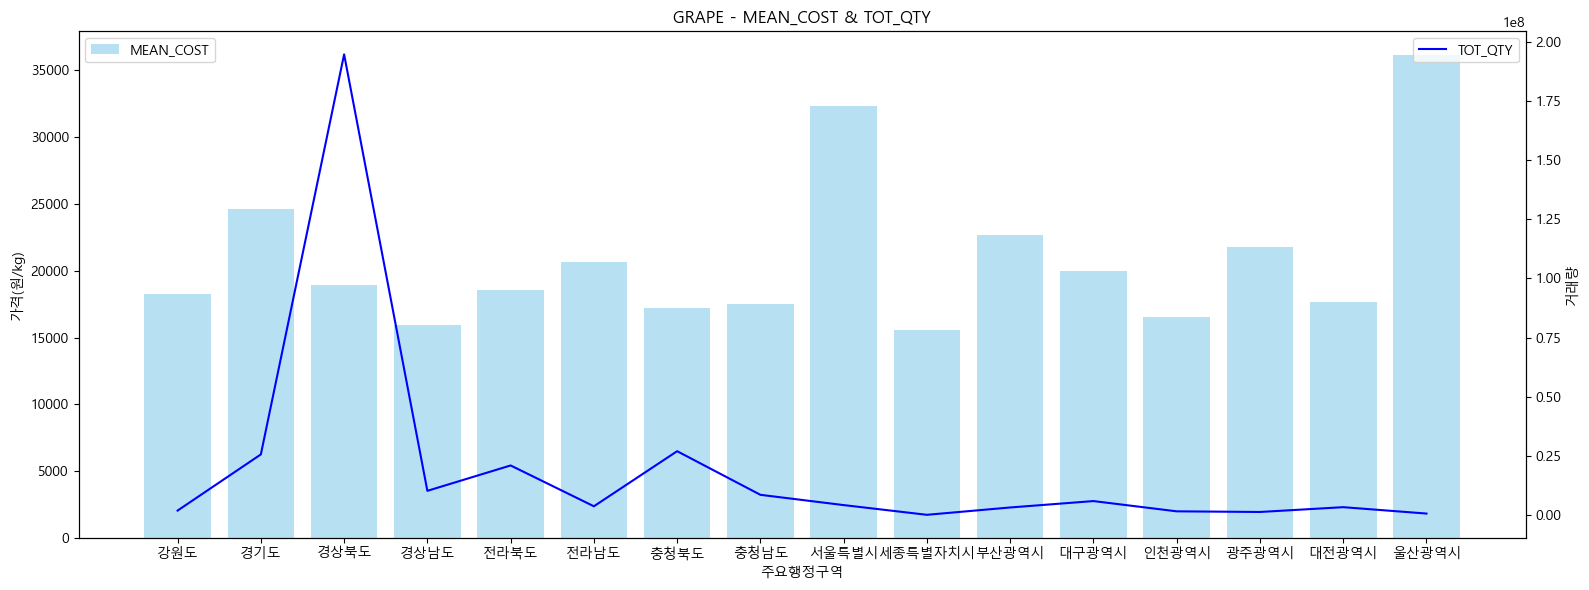

In [89]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = grape['SAN']

ax1.bar(x, grape['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, grape['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('GRAPE - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 망고

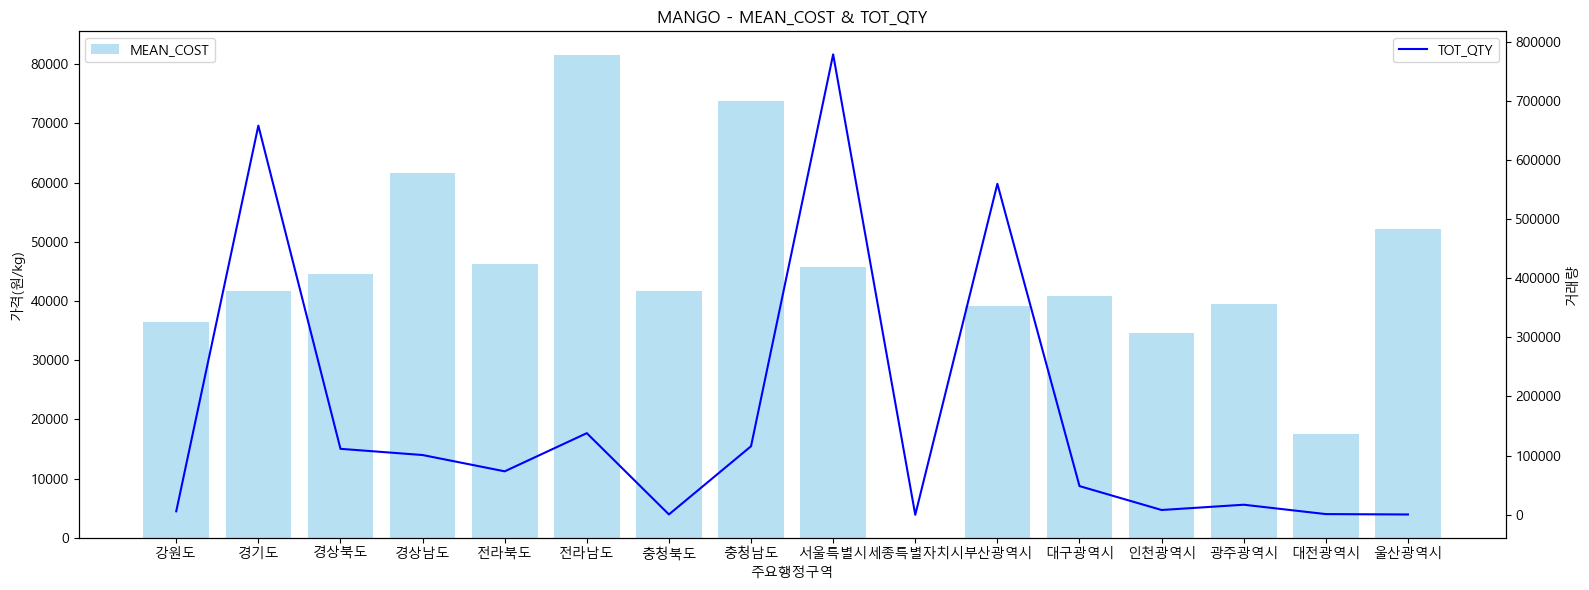

In [90]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = mango['SAN']

ax1.bar(x, mango['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, mango['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('MANGO - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 체리

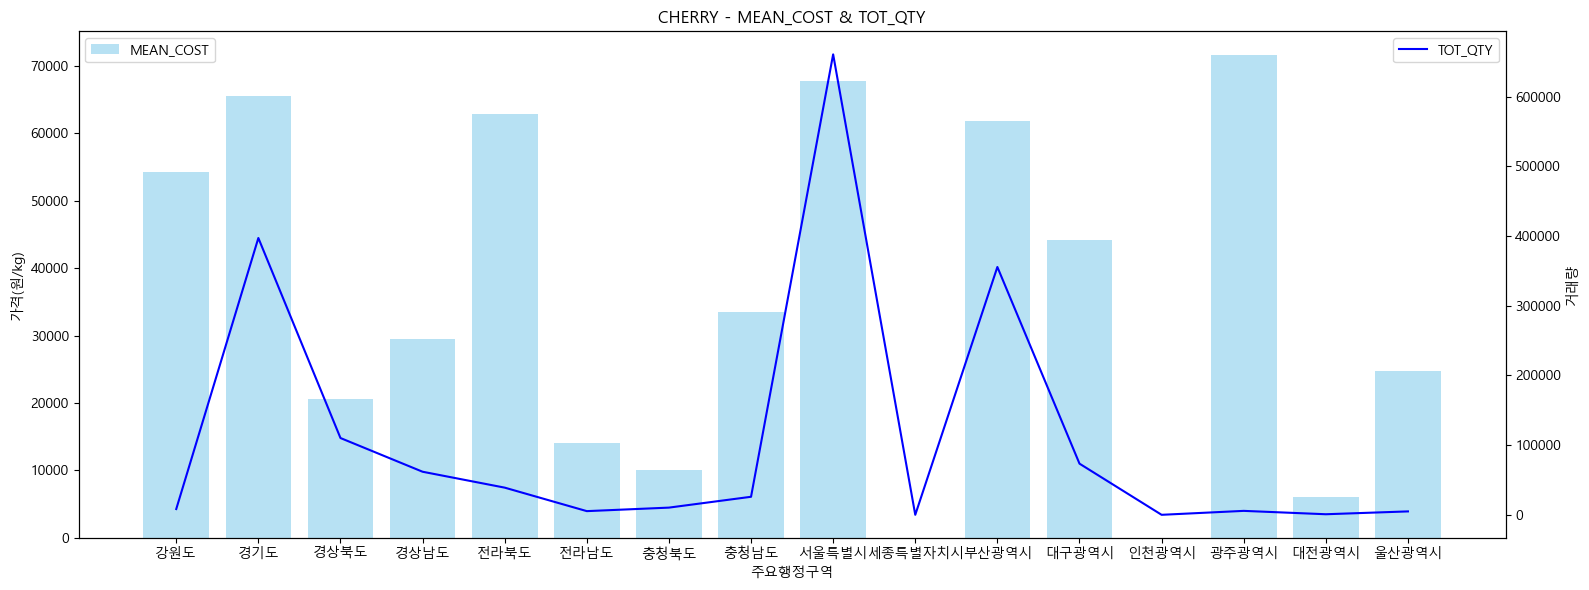

In [91]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = cherry['SAN']

ax1.bar(x, cherry['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, cherry['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('CHERRY - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 레몬

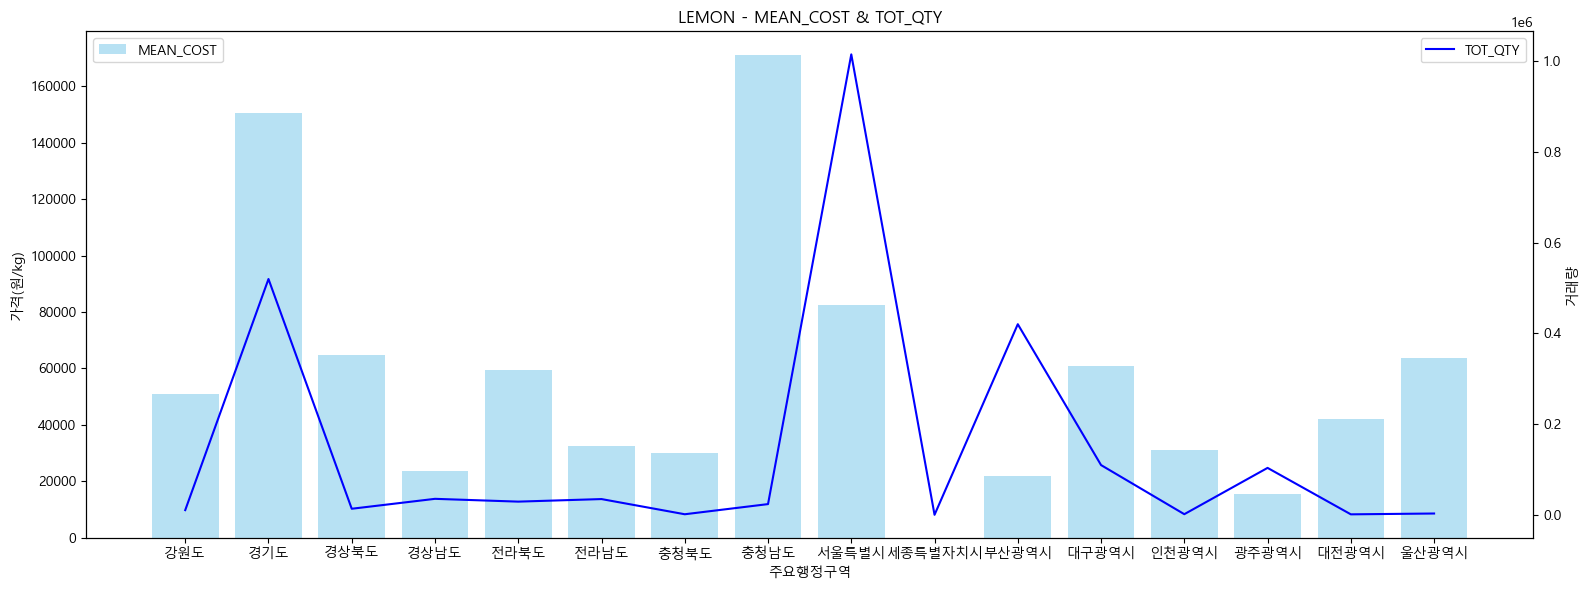

In [92]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = lemon['SAN']

ax1.bar(x, lemon['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, lemon['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('LEMON - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 블루베리

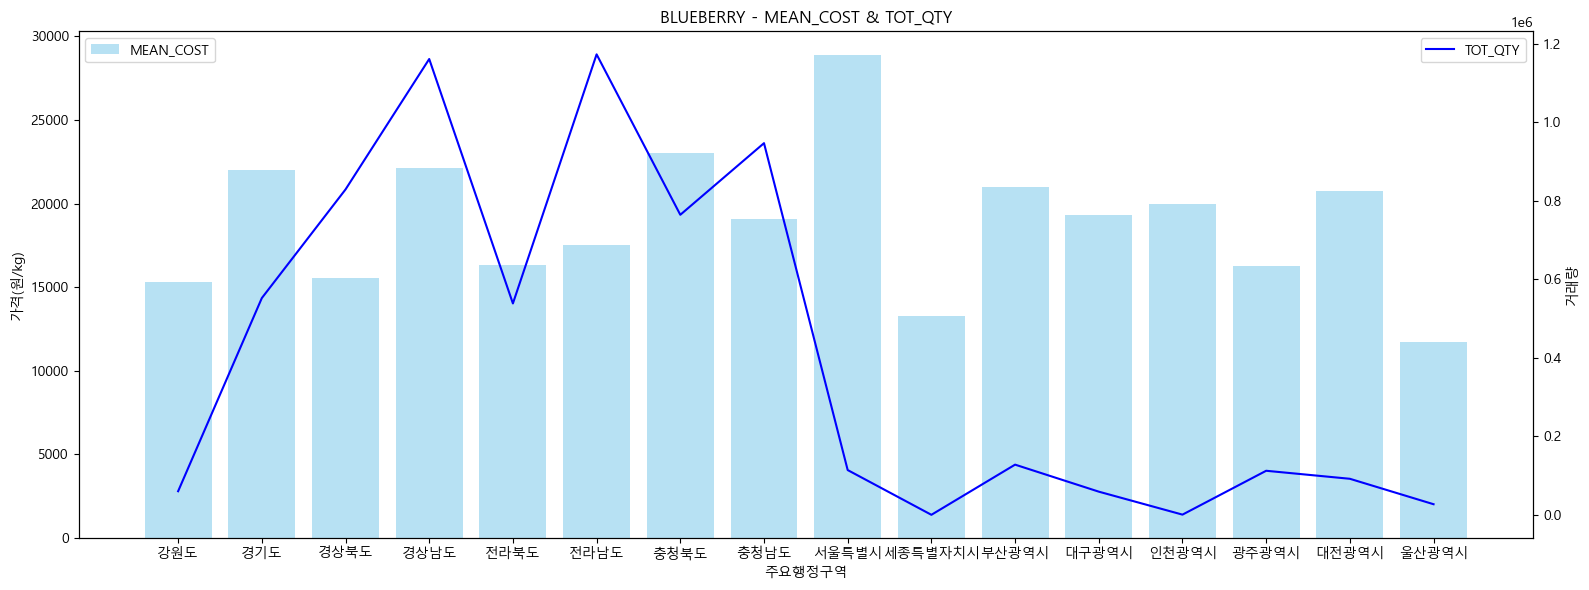

In [93]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = blueberry['SAN']

ax1.bar(x, blueberry['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, blueberry['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('BLUEBERRY - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 수박

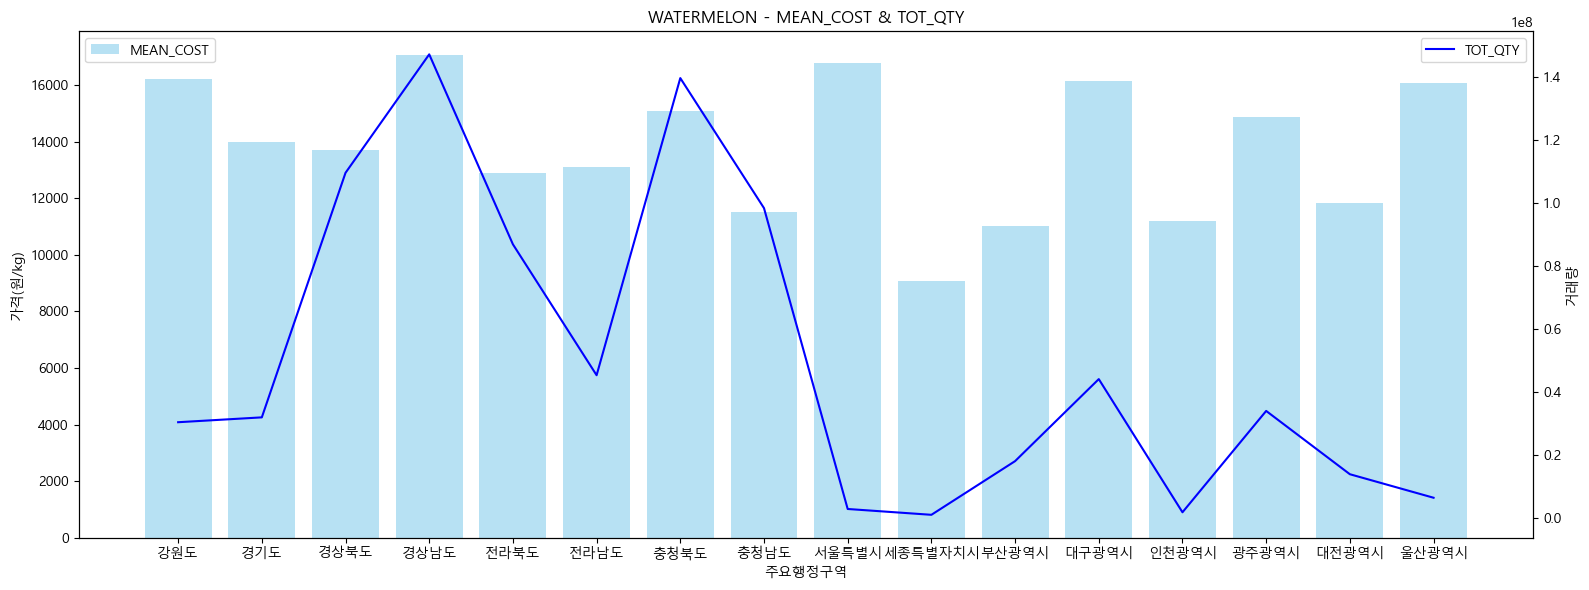

In [94]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = watermelon['SAN']

ax1.bar(x, watermelon['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, watermelon['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('WATERMELON - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 딸기

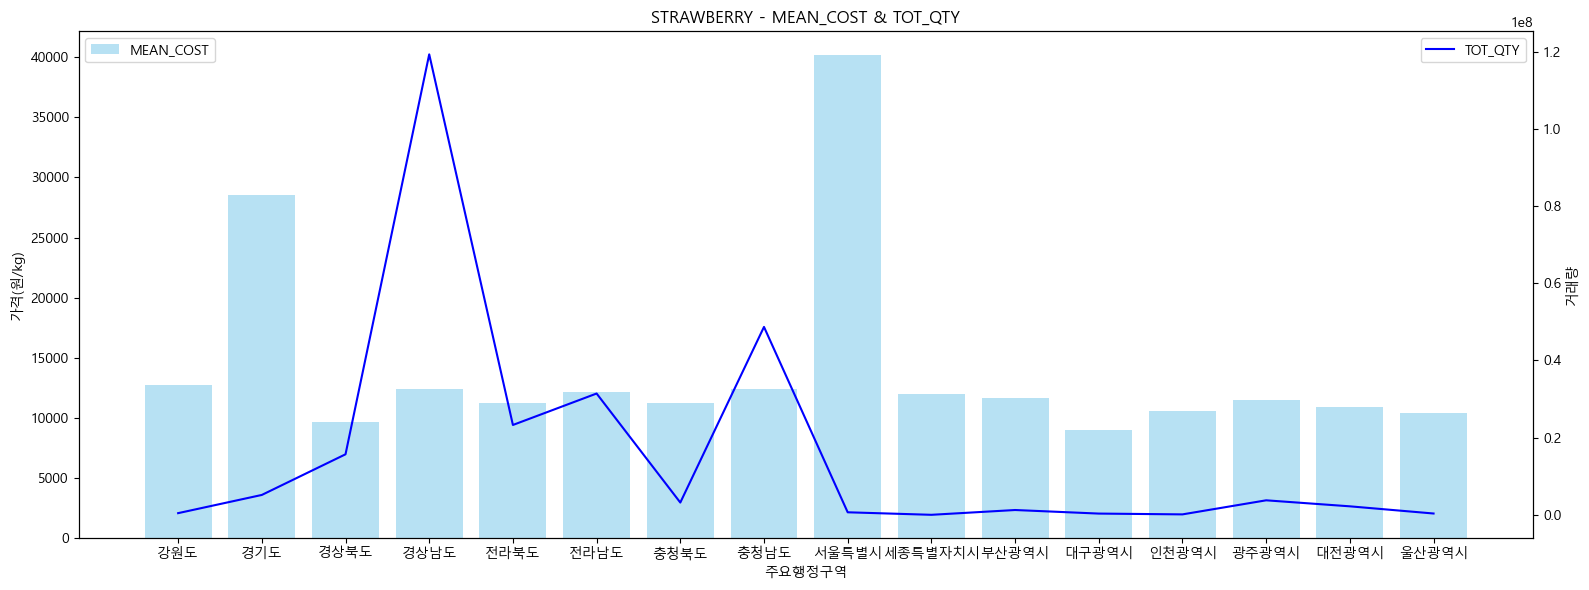

In [95]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = strawberry['SAN']

ax1.bar(x, strawberry['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, strawberry['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('STRAWBERRY - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- 메론

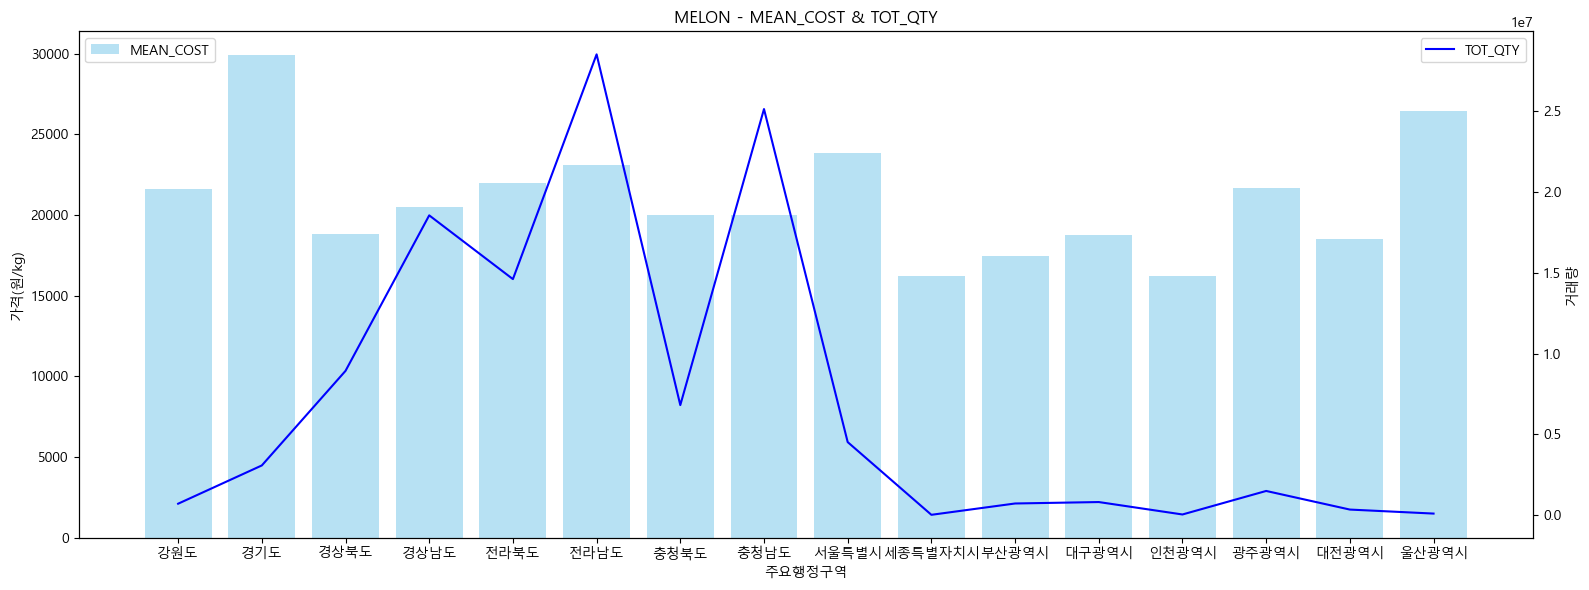

In [96]:
fig, ax1 = plt.subplots(figsize=(16, 6))

x = melon['SAN']

ax1.bar(x, melon['MEAN_COST'], color='skyblue', alpha=0.6, label='MEAN_COST')
ax1.set_xlabel('주요행정구역')
ax1.set_ylabel('가격(원/kg)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(x, melon['TOT_QTY'], color='blue', label='TOT_QTY')
ax2.set_ylabel('거래량', color='black')
ax2.tick_params(axis='y', labelcolor='black')

plt.title('MELON - MEAN_COST & TOT_QTY')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

주요행정구역별 가장 거래량 많은 품목

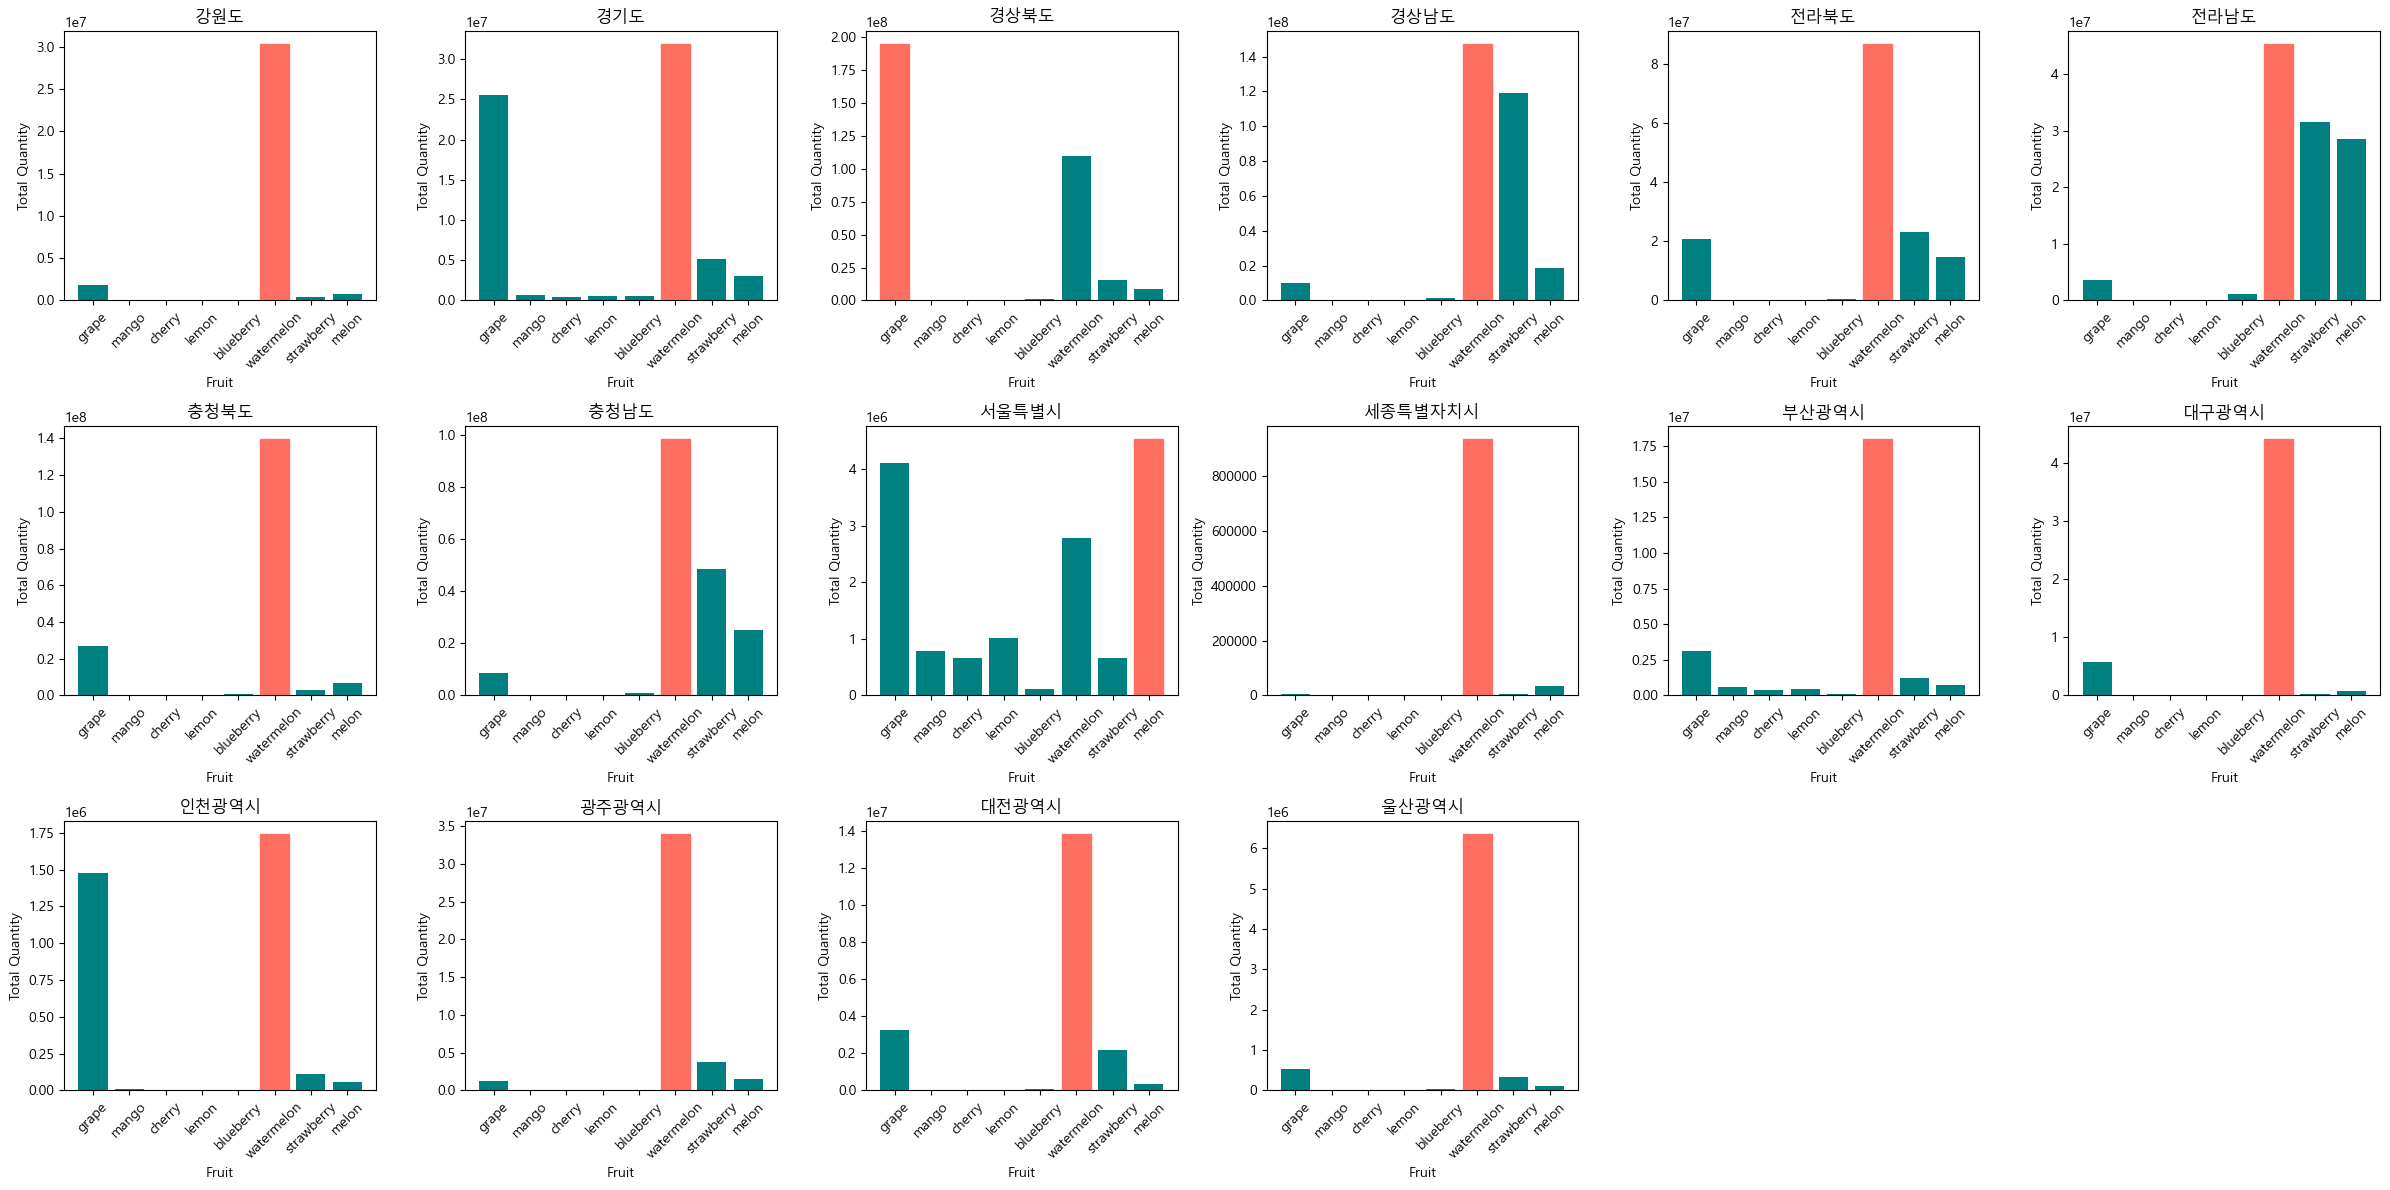

In [16]:
def prepare_data_for_san(fruit_dfs, san_values):
    all_fruit_data = []

    for san in san_values:
        san_data = []
        for name, df in fruit_dfs.items():
            filtered_df = df[df['SAN'] == san]
            if not filtered_df.empty:
                total_qty = filtered_df['TOT_QTY'].sum()
                san_data.append({'Fruit': name, 'Total_Qty': total_qty})

        if san_data:
            san_df = pd.DataFrame(san_data)
            all_fruit_data.append({'SAN': san, 'Data': san_df})

    return all_fruit_data

all_fruit_data = prepare_data_for_san(fruit_dfs, san_values)


fig, axes = plt.subplots(3, 6, figsize=(24, 12))
axes = axes.flatten()

for i, san_info in enumerate(all_fruit_data):
    ax = axes[i]
    san = san_info['SAN']
    san_df = san_info['Data']
    
    bars = ax.bar(san_df['Fruit'], san_df['Total_Qty'], color='#008080')
    
    max_qty = san_df['Total_Qty'].max()
    for bar in bars:
        if bar.get_height() == max_qty:
            bar.set_color('#FF6F61')  # 가장 많이 거래된 과일
    
    ax.set_title(san)
    ax.set_xlabel('Fruit')
    ax.set_ylabel('Total Quantity')
    ax.tick_params(axis='x', rotation=45)

for j in range(len(all_fruit_data), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()